In [1]:
from matplotlib import pyplot as plt
import numpy as np
import tqdm
import cv2
import sc2

%pylab inline

sc2.utils.jit.enable()
sc2.utils.imageio.configurate("default_show_mode", "plt")

Populating the interactive namespace from numpy and matplotlib


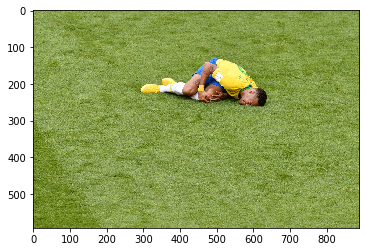

In [2]:
# let start from an image named "football"
image = sc2.utils.image_load("football")
# well, the original image is too large
image = cv2.resize(image, dsize=None, fx=0.3, fy=0.3)
# have a look at the original image
sc2.utils.image_show(image)

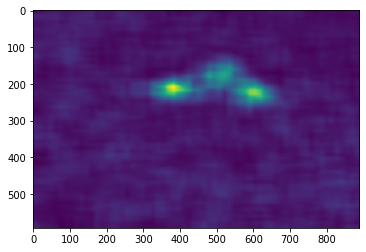

In [3]:
# have a look at the saliency
saliency = sc2.advanced.static_saliency(image)
saliency = sc2.advanced.gaussian(saliency)
sc2.utils.image_show(saliency)

In [4]:
# backup the original image first
backup = np.copy(image)

In [5]:
# decide how many seams to remove
steps = int(image.shape[1] * 0.4)

100%|██████████| 356/356 [00:24<00:00, 14.67it/s]


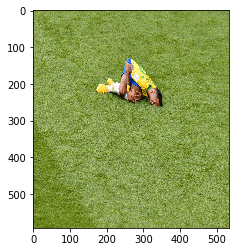

In [6]:
image = np.copy(backup)
# remove seams normally
for i in tqdm.tqdm(range(steps)):
    energy = sc2.energy.laplacian(image)
    seam = sc2.seamops.detect_seam(energy)
    image = sc2.seamops.remove_seam(image, seam)
# have a look
sc2.utils.image_show(image)

100%|██████████| 356/356 [00:22<00:00, 15.65it/s]


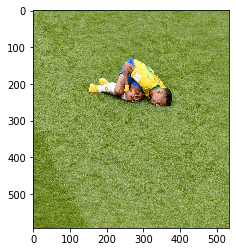

In [7]:
image = np.copy(backup)
# remove seams with saliency pretection
for i in tqdm.tqdm(range(steps)):
    saliency = sc2.advanced.static_saliency(image)
    energy = sc2.energy.laplacian(image)
    energy = sc2.utils.min_max_normalization(energy * saliency)
    seam = sc2.seamops.detect_seam(energy)
    image = sc2.seamops.remove_seam(image, seam)
# have a look
sc2.utils.image_show(image)

In [8]:
# the football player is preserved better